In [159]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# CANCELACION
## Para predecir si una reserva futura se cancelar√° o no, est√°s en un escenario de clasificaci√≥n, no de clustering. La diferencia principal es que la clasificaci√≥n tiene etiquetas conocidas (en este caso, "cancelado" o "no cancelado") y el objetivo es predecir estas etiquetas para nuevas reservas. El clustering, en cambio, agrupa datos sin etiquetas predefinidas.

## Aqu√≠ tienes c√≥mo ajustar tu enfoque para una tarea de clasificaci√≥n:

### 1. Preparaci√≥n de Datos
### Primero, aseg√∫rate de que tus datos est√©n listos para el modelo. Esto incluye:

### Eliminar o Imputar Valores Faltantes: Ya lo has hecho en pasos anteriores.
### Codificaci√≥n de Variables Categ√≥ricas: Usar OneHotEncoder como lo has hecho.
### Escalado de Caracter√≠sticas Num√©ricas: Usar StandardScaler como lo has hecho.

### 2. Definir el Preprocesador y el Pipeline para Clasificaci√≥n
### Definir el Preprocesador:

### Aseg√∫rate de incluir todas las variables que consideres relevantes para la predicci√≥n, y convierte las variables categ√≥ricas en formato num√©rico.

### Crear el Pipeline:

### Aqu√≠ se sustituye el KMeans por un clasificador, por ejemplo, LogisticRegression. Aseg√∫rate de ajustar el n√∫mero de clusters para los modelos de clustering o usar clasificadores adecuados.

In [97]:
!pip install xgboost


In [98]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

# PASO 1 | Importamos archivo

In [99]:
df = pd.read_csv(r'C:\Users\jazpi\Documents\TheBridge_DSPT_ML\PROYECTO_FINAL_ML\01_data\02_processed\df_final_modelar.csv')
df.head()

Posici√≥n     Llegada      Salida     Apartamento Portal de reserva  \
0  32474470  2022-12-30  2023-01-01    H BMA MONACO       Booking.com   
1  32470780  2022-12-30  2022-12-31  H BMA HELSINKI       Booking.com   
2  32407618  2022-12-31  2023-01-01    H BMA DUBLIN       Booking.com   
3  32401555  2022-12-28  2022-12-30     HD-GARAJE 5   Reserva directa   
4  32400367  2022-12-31  2023-01-01        HD DARIO       Booking.com   

                Creado  Adultos  Ni√±os Check-in Check-out  ...  \
0  2022-12-30 15:16:00      1.0    1.0    16:00     11:00  ...   
1  2022-12-30 13:38:00      2.0    0.0    16:00     11:00  ...   
2  2022-12-28 20:36:00      4.0    0.0    16:00     11:00  ...   
3  2022-12-28 18:20:00      0.0    0.0    16:00     11:00  ...   
4  2022-12-28 17:53:00      2.0    0.0    16:00     11:00  ...   

  Mensaje_Huesped                  BOOKING_NOTE GENIUS  Numero_Huespedes  \
0             NaN  Payment charge is EUR 2.5839   True               2.0   
1             NaN   Payment charge is EUR 1.045   True               2.0   
2             NaN   Payment charge is EUR 2.695   True               4.0   
3             NaN                           NaN  False               0.0   
4             NaN   Payment charge is EUR 2.211   True               2.0   

           Lead_Time     ADR  Precio_Medio_Historico       Fecha  \
0    0 days 15:16:00  117.45              110.427971  2022-12-30   
1    0 days 13:38:00   95.00              111.276875  2022-12-30   
2  -3 days +20:36:00  245.00              121.511303  2022-12-31   
3    0 days 18:20:00   20.00               14.154531  2022-12-28   
4  -3 days +17:53:00  201.00              108.699008  2022-12-31   

  Apartamentos_Ocupados Porcentaje_Ocupacion  
0                  12.0            29.268293  
1                  12.0            29.268293  
2                  16.0            39.024390  
3                  21.0            51.219512  
4                  16.0            39.024390  

[5 rows x 32 columns]

# PASO 2 | EXPLORACION B√ÅSICA de los DATOS

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14170 entries, 0 to 14169
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Posici√≥n                14170 non-null  int64  
 1   Llegada                 14170 non-null  object 
 2   Salida                  14170 non-null  object 
 3   Apartamento             14170 non-null  object 
 4   Portal de reserva       14170 non-null  object 
 5   Creado                  14170 non-null  object 
 6   Adultos                 14170 non-null  float64
 7   Ni√±os                   14170 non-null  float64
 8   Check-in                14170 non-null  object 
 9   Check-out               14170 non-null  object 
 10  Notas                   13352 non-null  object 
 11  Precio                  14170 non-null  float64
 12  Detalles de precios     12585 non-null  object 
 13  Comisi√≥n incluida       14170 non-null  float64
 14  Pagado                  14170 non-n

El conjunto de datos consta de 14,170 entradas.

Columnas: El conjunto de datos contiene 31 columnas, que representan diversos atributos relacionados con las reservas de hotel.

Tipos de Datos:

La mayor√≠a de las columnas, 18 para ser precisos, son de tipo de dato objeto (a menudo representan cadenas de texto o datos categ√≥ricos).
2 columnas son de tipo de dato int64, que representan valores enteros.
10 columnas son de tipo de dato float64, que t√≠picamente denota valores decimales.
1 columnas son de tipo de dato booleano

Valores Faltantes:

La columna Notas tiene 818 valores faltantes.
La columna Detalles de precios tiene 1,584 valores faltantes.
La columna N√∫mero de reserva tiene 3,795 valores faltantes.
La columna Mensaje_Huesped tiene un n√∫mero significativo de valores faltantes, totalizando 12,189.
La columna BOOKING_NOTE tiene 3,802 valores faltantes.

Estos valores faltantes podr√≠an necesitar ser tratados, dependiendo del contexto del an√°lisis o del modelo que se pretende construir.

In [101]:
df['GENIUS'] = df['GENIUS'].astype(str)
df.describe().T

count          mean           std           min  \
Posici√≥n                14170.0  4.253946e+07  1.435905e+07  1.539014e+07   
Adultos                 14170.0  2.463726e+00  1.482575e+00  0.000000e+00   
Ni√±os                   14170.0  3.607622e-01  7.820496e-01  0.000000e+00   
Precio                  14170.0  2.300720e+02  2.917964e+02  1.150000e+00   
Comisi√≥n incluida       14170.0  3.109997e+01  3.794185e+01  0.000000e+00   
N√∫mero de noches        14170.0  1.816161e+00  1.950443e+00  1.000000e+00   
Numero_Reserva          10375.0  3.643374e+09  8.287956e+08  1.005919e+09   
Numero_Huespedes        14170.0  2.824488e+00  1.639560e+00  0.000000e+00   
ADR                     14170.0  1.238623e+02  8.256586e+01  1.150000e+00   
Precio_Medio_Historico  14170.0  1.143600e+02  4.101778e+01  1.000000e+01   
Apartamentos_Ocupados   14170.0  3.103394e+01  7.017369e+00  4.000000e+00   
Porcentaje_Ocupacion    14170.0  7.569255e+01  1.711553e+01  9.756098e+00   

                                 25%           50%           75%           max  
Posici√≥n                2.989671e+07  4.215626e+07  5.392231e+07  6.985467e+07  
Adultos                 2.000000e+00  2.000000e+00  3.000000e+00  8.000000e+00  
Ni√±os                   0.000000e+00  0.000000e+00  0.000000e+00  7.000000e+00  
Precio                  8.200000e+01  1.480000e+02  2.720000e+02  7.847600e+03  
Comisi√≥n incluida       1.065000e+01  2.053500e+01  3.834000e+01  8.677500e+02  
N√∫mero de noches        1.000000e+00  1.000000e+00  2.000000e+00  8.100000e+01  
Numero_Reserva          2.935646e+09  3.816649e+09  4.266050e+09  5.000159e+09  
Numero_Huespedes        2.000000e+00  3.000000e+00  4.000000e+00  8.000000e+00  
ADR                     7.100000e+01  1.020000e+02  1.583333e+02  1.502700e+03  
Precio_Medio_Historico  9.658330e+01  1.104951e+02  1.234379e+02  3.316667e+02  
Apartamentos_Ocupados   2.300000e+01  3.100000e+01  4.000000e+01  4.100000e+01  
Porcentaje_Ocupacion    5.609756e+01  7.560976e+01  9.756098e+01  1.000000e+02

# Variables Numericas
<p>¬∑ Posici√≥n: Numero de registro en el sistema de gestion de propiedad. (PMS)</p>
<p>¬∑ Adultos: Adultos en la reserva.</p>
<p>¬∑ Ni√±os: Ni√±os en la reserva.</p>
<p>¬∑ Precio: Valor total del ticket.</p>
<p>¬∑ Comisi√≥n incluida: Importe pagado al intermediario.</p>
<p>¬∑ N√∫mero de noches: N√∫mero de noches en la reserva.</p>
<p>¬∑ Numero_Reserva: N√∫mero de la reserva. </p>
<p>¬∑ Numero_Huespedes: Numero de personas, adultos y ni√±os, que incluye la reserva.</p>
<p>¬∑ ADR: Previo por d√≠a vendido en la reserva.</p>
<p>¬∑ Precio_Medio_Historico: Precio Medio hist√≥srico para ese apartamento y d√≠a.</p>
<p>¬∑ Apartamentos_Ocupados: N√∫mero de apartamentos ocupadas en ese d√≠a.</p>
<p>¬∑ Porcentaje_Ocupacion: Porcentaje de ocupaci√≥n total del portfolio. </p>

# Caracter√≠sticas de Datos Ruidosos: 

<p>Basado en las descripciones y las inferencias proporcionadas anteriormente, las siguientes caracter√≠sticas parecen contener datos ruidosos:</p>


<p> Adultos: El valor m√≠nimo es 0, lo que implica reservas sin ning√∫n adulto. Esto podr√≠a ser un error de entrada de datos, a menos que haya casos leg√≠timos en los que solo ni√±os o beb√©s reserven una habitaci√≥n.</p>
<p> Ni√±os: Tiene un valor m√°ximo de 7, lo cual parece inusualmente alto para una sola reserva. Esto podr√≠a ser un posible valor at√≠pico o un error de entrada de datos, pero requerir√≠a m√°s contexto o conocimiento del dominio para decirlo con certeza. </p>

Una investigaci√≥n adicional, posiblemente involucrando expertos en el dominio o contexto adicional, ser√≠a necesaria para determinar la verdadera naturaleza de estos puntos de datos. </p>

In [102]:
df.describe(include='object').T

count unique  \
Llegada              14170   1015   
Salida               14170   1019   
Apartamento          14170     41   
Portal de reserva    14170      4   
Creado               14170  13652   
Check-in             14170      1   
Check-out            14170      1   
Notas                13352  12819   
Detalles de precios  12585   3718   
Pagado               14170      2   
Adelanto ya pagado   14170      2   
Estado               14170      3   
Hu√©sped_Token        14170  14170   
Tel√©fono_Token       14170  14170   
Email_Token          14170  14170   
Mensaje_Huesped       1981   1180   
BOOKING_NOTE         10368   2245   
GENIUS               14170      2   
Lead_Time            14170  11035   
Fecha                14170   1015   

                                                                   top   freq  
Llegada                                                     2024-05-24     36  
Salida                                                      2024-05-26     45  
Apartamento                                                   HD BRUNO    691  
Portal de reserva                                          Booking.com  10387  
Creado                                             2024-06-03 13:18:00      8  
Check-in                                                         16:00  14170  
Check-out                                                        11:00  14170  
Notas                                                         efectivo     18  
Detalles de precios                                     IVA - EUR 5.36    107  
Pagado                                                              S√≠  11449  
Adelanto ya pagado                                                  No  14165  
Estado                                                       Reservado  12745  
Hu√©sped_Token                     165b0a32-f0de-472f-91b0-f4db1a5de1e9      1  
Tel√©fono_Token                    ac05586d-fcf0-48c9-951a-a543d2b662d9      1  
Email_Token                       9f635b58-7a19-4339-95bf-43a633fb37c0      1  
Mensaje_Huesped      Approximate time of arrival: between 16:00 and...    181  
BOOKING_NOTE                               Payment charge is EUR 0.715    175  
GENIUS                                                            True   9045  
Lead_Time                                              0 days 12:30:00     13  
Fecha                                                       2024-05-24     36

# Variables Categ√≥ricas
<p>¬∑ Llegada: Fecha de llegada al apartamento</p>
<p>¬∑ Salida: Fecha de salida del apartamento.</p>
<p>¬∑ Apartamento: Apartamento reservado.</p>
<p>¬∑ Portal de reserva: Canal por donde se hizo la reserva.</p>
<p>¬∑ Creado: Fecha en que se hizo la reserva.</p>
<p>¬∑ Check-in: Hora de entrada.</p>
<p>¬∑ Check-out: Hora de salida. </p>
<p>¬∑ Notas: Campo que viene del canal Booking con informaci√≥n de la reserva.</p>
<p>¬∑ Detalles de precios: Desglose del IVA.</p>
<p>¬∑ Pagado: S√≠ o No seg√∫n la reserva est√© pagada o no.</p>
<p>¬∑ Adelanto ya pagado: S√≠ o No seg√∫n hayan pagado un adelanto.</p>
<p>¬∑ Estado: Estado de la reserva: Reservado, cancelado. </p>
<p>¬∑ Tel√©fono_Token: Numero de tel√©fono del cliente TOKENIZADO por protecci√≥n de datos sensibles.</p>
<p>¬∑ Email_Token: Email del cliente TOKENIZADO por protecci√≥n de datos sensibles.</p>
<p>¬∑ Mensaje_Huesped: Extar√≠do de Notas. Algunos canales en el campo Notas dejan los mensajes espec√≠ficos del cliente en el momento de la reserva.</p>
<p>¬∑ GENIUS: Es del Programa Genius de Booking.com? S√≠ o No..</p>
<p>¬∑ Lead_Time: Tiempo de antelaci√≥n con la que est√° hecha la reserva. </p>
<p>¬∑ Fecha: Es una variable creada para poder calcular la ocupaci√≥n el d√≠a en el que entra el hu√©sped. </p>

# PASO 3 | Selecci√≥n de Features 

<p>En la etapa de Selecci√≥n y Creaci√≥n de Caracter√≠sticas, preparamos el conjunto de datos para el modelado realizando varias actividades cruciales:</p>

<p>Eliminaci√≥n de Caracter√≠sticas Directamente Relacionadas: Eliminamos caracter√≠sticas que est√°n directamente relacionadas con la variable objetivo para evitar la filtraci√≥n de datos y asegurar una evaluaci√≥n justa del modelo.</p>
<p>Eliminaci√≥n de Caracter√≠sticas Irrelevantes: A continuaci√≥n, eliminamos caracter√≠sticas irrelevantes que no aportan informaci√≥n √∫til para predecir la variable objetivo.</p>
<p>Ingenier√≠a y Eliminaci√≥n de Caracter√≠sticas de Alta Cardinalidad: Creamos algunas caracter√≠sticas de alta cardinalidad para extraer informaci√≥n relevante y luego eliminamos todas las caracter√≠sticas de alta cardinalidad, incluidas aquellas de las que extrajimos informaci√≥n.</p>
<p>Estas actividades ayudan a reducir la dimensionalidad del conjunto de datos, a evitar la filtraci√≥n de datos y a crear nuevas caracter√≠sticas que pueden proporcionar informaci√≥n adicional para el modelo.</p>

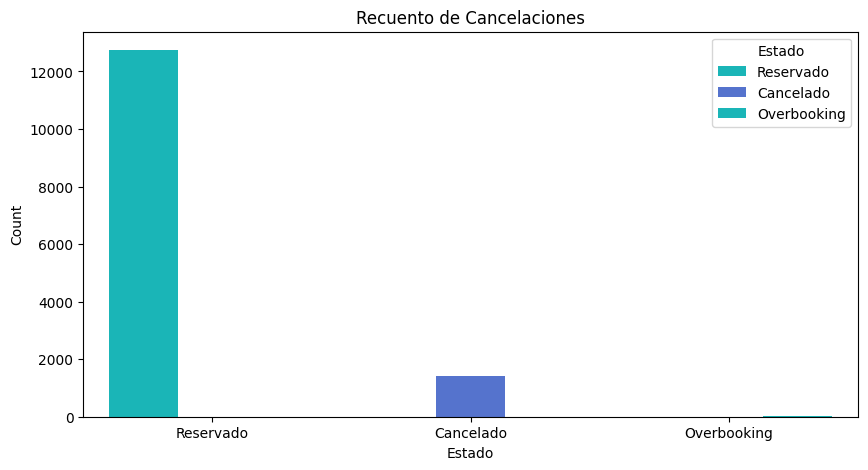

In [103]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Estado', hue='Estado', data=df, palette=['darkturquoise', 'royalblue'])
plt.title('Recuento de Cancelaciones')
plt.xlabel('Estado')
plt.ylabel('Count')
plt.legend(title='Estado', labels=['Reservado', 'Cancelado', 'Overbooking'])
plt.show()

In [104]:
print(df['Lead_Time'].head(10))

0      0 days 15:16:00
1      0 days 13:38:00
2    -3 days +20:36:00
3      0 days 18:20:00
4    -3 days +17:53:00
5    -2 days +12:14:00
6      0 days 09:31:00
7    -2 days +22:22:00
8    -2 days +21:12:00
9    -3 days +22:17:00
Name: Lead_Time, dtype: object


In [105]:
df['Lead_Time'].isnull().sum()


0

In [106]:
df['Lead_Time'].describe()

count               14170
unique              11035
top       0 days 12:30:00
freq                   13
Name: Lead_Time, dtype: object

In [107]:
# Convertir 'Lead_Time' a timedelta
df['Lead_Time'] = pd.to_timedelta(df['Lead_Time'])
# Convertir 'Lead_Time' a n√∫mero de d√≠as
df['Lead_Time_Days'] = df['Lead_Time'].dt.total_seconds() / (24 * 3600)
# Eliminar la columna original si ya no es necesaria
df = df.drop(columns=['Lead_Time'])
print(df[['Lead_Time_Days']].head())
print(df.dtypes)

   Lead_Time_Days
0        0.636111
1        0.568056
2       -2.141667
3        0.763889
4       -2.254861
Posici√≥n                    int64
Llegada                    object
Salida                     object
Apartamento                object
Portal de reserva          object
Creado                     object
Adultos                   float64
Ni√±os                     float64
Check-in                   object
Check-out                  object
Notas                      object
Precio                    float64
Detalles de precios        object
Comisi√≥n incluida         float64
Pagado                     object
Adelanto ya pagado         object
N√∫mero de noches            int64
Estado                     object
Hu√©sped_Token              object
Tel√©fono_Token             object
Email_Token                object
Numero_Reserva            float64
Mensaje_Huesped            object
BOOKING_NOTE               object
GENIUS                     object
Numero_Huespedes          float64
AD

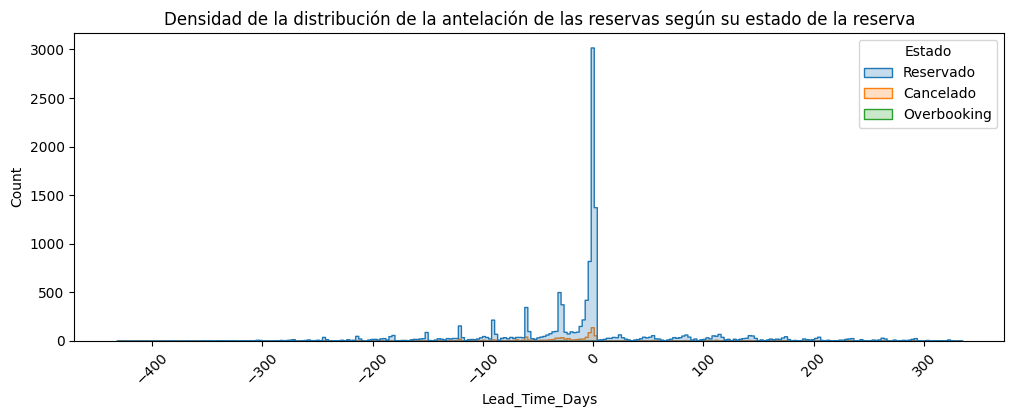

In [108]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df, x="Lead_Time_Days", hue="Estado", element="step", stat="count", common_norm=False)
plt.title('Densidad de la distribuci√≥n de la antelaci√≥n de las reservas seg√∫n su estado de la reserva')
plt.xticks(rotation=45)  # Inclina los valores del eje X en 90 grados
plt.show()


# PASO 4 | Eliminar Features con Alta Cardinalidad.
Esto es valores √∫nicos o con much√≠simas opciones diferentes.

In [109]:
df.describe(include='object').T

count unique  \
Llegada              14170   1015   
Salida               14170   1019   
Apartamento          14170     41   
Portal de reserva    14170      4   
Creado               14170  13652   
Check-in             14170      1   
Check-out            14170      1   
Notas                13352  12819   
Detalles de precios  12585   3718   
Pagado               14170      2   
Adelanto ya pagado   14170      2   
Estado               14170      3   
Hu√©sped_Token        14170  14170   
Tel√©fono_Token       14170  14170   
Email_Token          14170  14170   
Mensaje_Huesped       1981   1180   
BOOKING_NOTE         10368   2245   
GENIUS               14170      2   
Fecha                14170   1015   

                                                                   top   freq  
Llegada                                                     2024-05-24     36  
Salida                                                      2024-05-26     45  
Apartamento                                                   HD BRUNO    691  
Portal de reserva                                          Booking.com  10387  
Creado                                             2024-06-03 13:18:00      8  
Check-in                                                         16:00  14170  
Check-out                                                        11:00  14170  
Notas                                                         efectivo     18  
Detalles de precios                                     IVA - EUR 5.36    107  
Pagado                                                              S√≠  11449  
Adelanto ya pagado                                                  No  14165  
Estado                                                       Reservado  12745  
Hu√©sped_Token                     165b0a32-f0de-472f-91b0-f4db1a5de1e9      1  
Tel√©fono_Token                    ac05586d-fcf0-48c9-951a-a543d2b662d9      1  
Email_Token                       9f635b58-7a19-4339-95bf-43a633fb37c0      1  
Mensaje_Huesped      Approximate time of arrival: between 16:00 and...    181  
BOOKING_NOTE                               Payment charge is EUR 0.715    175  
GENIUS                                                            True   9045  
Fecha                                                       2024-05-24     36

In [110]:
# Vamos a crea run dataframe espec√≠fico con el n√∫mero de catgor√≠as √∫nicas y valores faltantes para cada feature de alta-cardinalidad.
Alta_cardinalidad_features = ['Hu√©sped_Token', 'Posici√≥n', 'Notas', 'Tel√©fono_Token', 'Email_Token', 'Fecha','Salida', 'Llegada']
Categorias_unicas = df[Alta_cardinalidad_features].nunique()
Valores_Faltantes = df[Alta_cardinalidad_features].isnull().sum()

# Combinamos las dos series en un √∫nico dataframe
Alta_cardinalidad_df = pd.DataFrame({'Unicas_Categorias': Categorias_unicas, 'Missing_Values': Valores_Faltantes})

Alta_cardinalidad_df

Unicas_Categorias  Missing_Values
Hu√©sped_Token               14170               0
Posici√≥n                    14153               0
Notas                       12819             818
Tel√©fono_Token              14170               0
Email_Token                 14170               0
Fecha                        1015               0
Salida                       1019               0
Llegada                      1015               0

# Eliminar la variable 'Hu√©sped_Token' y otras de alta cardinalidad

In [111]:
# Crear una nueva columna 'Reservas_Hechas' que cuenta el n√∫mero de reservas hechas por cada cliente basado en su nombre
df['Reservas_Hechas'] = df.groupby('Hu√©sped_Token')['Hu√©sped_Token'].transform('count')

# Eliminar la variable 'Hu√©sped_Token' y otras de alta cardinalidad
df = df.drop(['Hu√©sped_Token', 'Posici√≥n', 'Notas', 'Tel√©fono_Token', 'Email_Token', 'Numero_Reserva', 'Check-out', 'Check-in', 'Creado', 'Salida', 'Llegada', 'Fecha', 'Detalles de precios', 'BOOKING_NOTE'], axis=1)

# Visualizar las primeras filas de la nueva columna
df[['Reservas_Hechas']].head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14170 entries, 0 to 14169
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Apartamento             14170 non-null  object 
 1   Portal de reserva       14170 non-null  object 
 2   Adultos                 14170 non-null  float64
 3   Ni√±os                   14170 non-null  float64
 4   Precio                  14170 non-null  float64
 5   Comisi√≥n incluida       14170 non-null  float64
 6   Pagado                  14170 non-null  object 
 7   Adelanto ya pagado      14170 non-null  object 
 8   N√∫mero de noches        14170 non-null  int64  
 9   Estado                  14170 non-null  object 
 10  Mensaje_Huesped         1981 non-null   object 
 11  GENIUS                  14170 non-null  object 
 12  Numero_Huespedes        14170 non-null  float64
 13  ADR                     14170 non-null  float64
 14  Precio_Medio_Historico  14170 non-n

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14170 entries, 0 to 14169
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Apartamento             14170 non-null  object 
 1   Portal de reserva       14170 non-null  object 
 2   Adultos                 14170 non-null  float64
 3   Ni√±os                   14170 non-null  float64
 4   Precio                  14170 non-null  float64
 5   Comisi√≥n incluida       14170 non-null  float64
 6   Pagado                  14170 non-null  object 
 7   Adelanto ya pagado      14170 non-null  object 
 8   N√∫mero de noches        14170 non-null  int64  
 9   Estado                  14170 non-null  object 
 10  Mensaje_Huesped         1981 non-null   object 
 11  GENIUS                  14170 non-null  object 
 12  Numero_Huespedes        14170 non-null  float64
 13  ADR                     14170 non-null  float64
 14  Precio_Medio_Historico  14170 non-n

In [113]:
df['Adultos'].value_counts()

Adultos
2.0    6078
3.0    2094
1.0    1943
4.0    1893
0.0     974
5.0     525
6.0     387
7.0     197
8.0      79
Name: count, dtype: int64

In [114]:
condicion = df['Adultos'] == 0
df[condicion].describe()

Adultos       Ni√±os       Precio  Comisi√≥n incluida  N√∫mero de noches  \
count    974.0  974.000000   974.000000         974.000000        974.000000   
mean       0.0    0.004107   133.369867           0.025257          2.534908   
std        0.0    0.090582   464.499448           0.788235          4.712747   
min        0.0    0.000000    10.000000           0.000000          1.000000   
25%        0.0    0.000000    20.000000           0.000000          1.000000   
50%        0.0    0.000000    40.000000           0.000000          1.000000   
75%        0.0    0.000000    77.000000           0.000000          2.000000   
max        0.0    2.000000  7847.600000          24.600000         62.000000   

       Numero_Huespedes         ADR  Precio_Medio_Historico  \
count        974.000000  974.000000              974.000000   
mean           0.004107   40.686159               45.270959   
std            0.090582   46.350005               47.483138   
min            0.000000    3.333333               10.000000   
25%            0.000000   20.000000               16.868211   
50%            0.000000   20.000000               19.316261   
75%            0.000000   54.000000               82.172536   
max            2.000000  900.000000              241.082737   

       Apartamentos_Ocupados  Porcentaje_Ocupacion  Lead_Time_Days  \
count             974.000000            974.000000      974.000000   
mean               29.890144             72.902790       -1.697468   
std                 6.998109             17.068559       88.087654   
min                 6.000000             14.634146     -381.221528   
25%                23.000000             56.097561      -29.403299   
50%                31.000000             75.609756       -0.298958   
75%                31.000000             75.609756        0.749826   
max                41.000000            100.000000      323.885417   

       Reservas_Hechas  
count            974.0  
mean               1.0  
std                0.0  
min                1.0  
25%                1.0  
50%                1.0  
75%                1.0  
max                1.0

In [115]:
df['Ni√±os'].value_counts()

Ni√±os
0.0    11268
2.0     1493
1.0     1086
3.0      269
4.0       43
5.0        6
6.0        4
7.0        1
Name: count, dtype: int64

In [116]:
df['Reservas_Hechas'].value_counts()

Reservas_Hechas
1    14170
Name: count, dtype: int64

# Numerizar las variables Categ√≥ricas

In [117]:
# One-hot encode the specified columns
one_hot_cols = ['Apartamento', 'Estado', 'Portal de reserva', 'GENIUS', 'Adelanto ya pagado', 'Pagado']
df_dummies = pd.get_dummies(df, columns=one_hot_cols, drop_first=False)

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14170 entries, 0 to 14169
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Adultos                            14170 non-null  float64
 1   Ni√±os                              14170 non-null  float64
 2   Precio                             14170 non-null  float64
 3   Comisi√≥n incluida                  14170 non-null  float64
 4   N√∫mero de noches                   14170 non-null  int64  
 5   Mensaje_Huesped                    1981 non-null   object 
 6   Numero_Huespedes                   14170 non-null  float64
 7   ADR                                14170 non-null  float64
 8   Precio_Medio_Historico             14170 non-null  float64
 9   Apartamentos_Ocupados              14170 non-null  float64
 10  Porcentaje_Ocupacion               14170 non-null  float64
 11  Lead_Time_Days                     14170 non-null  

In [119]:
import pandas as pd

# Lista de columnas que deseas transformar
columnas_a_transformar = ['Mensaje_Huesped']

# Crear nuevas columnas indicando si est√°n informadas (1) o no (0)
for col in columnas_a_transformar:
    df_dummies[f'{col}_Informada'] = df[col].notna().astype(int)
    

In [120]:
df_dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14170 entries, 0 to 14169
Data columns (total 68 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Adultos                            14170 non-null  float64
 1   Ni√±os                              14170 non-null  float64
 2   Precio                             14170 non-null  float64
 3   Comisi√≥n incluida                  14170 non-null  float64
 4   N√∫mero de noches                   14170 non-null  int64  
 5   Mensaje_Huesped                    1981 non-null   object 
 6   Numero_Huespedes                   14170 non-null  float64
 7   ADR                                14170 non-null  float64
 8   Precio_Medio_Historico             14170 non-null  float64
 9   Apartamentos_Ocupados              14170 non-null  float64
 10  Porcentaje_Ocupacion               14170 non-null  float64
 11  Lead_Time_Days                     14170 non-null  

In [121]:
print(df_dummies['Lead_Time_Days'].head(10))
df_dummies['Lead_Time_Days'].isnull().sum()
df_dummies['Lead_Time_Days'].describe()

0    0.636111
1    0.568056
2   -2.141667
3    0.763889
4   -2.254861
5   -1.490278
6    0.396528
7   -1.068056
8   -1.116667
9   -2.071528
Name: Lead_Time_Days, dtype: float64


count    14170.000000
mean        -7.995974
std         94.407082
min       -432.023611
25%        -32.535590
50%         -1.581597
75%          0.659549
max        334.530556
Name: Lead_Time_Days, dtype: float64

In [122]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14170 entries, 0 to 14169
Data columns (total 68 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Adultos                            14170 non-null  float64
 1   Ni√±os                              14170 non-null  float64
 2   Precio                             14170 non-null  float64
 3   Comisi√≥n incluida                  14170 non-null  float64
 4   N√∫mero de noches                   14170 non-null  int64  
 5   Mensaje_Huesped                    1981 non-null   object 
 6   Numero_Huespedes                   14170 non-null  float64
 7   ADR                                14170 non-null  float64
 8   Precio_Medio_Historico             14170 non-null  float64
 9   Apartamentos_Ocupados              14170 non-null  float64
 10  Porcentaje_Ocupacion               14170 non-null  float64
 11  Lead_Time_Days                     14170 non-null  

# PASO 5 | Comprobaci√≥n Datos No Balanceados


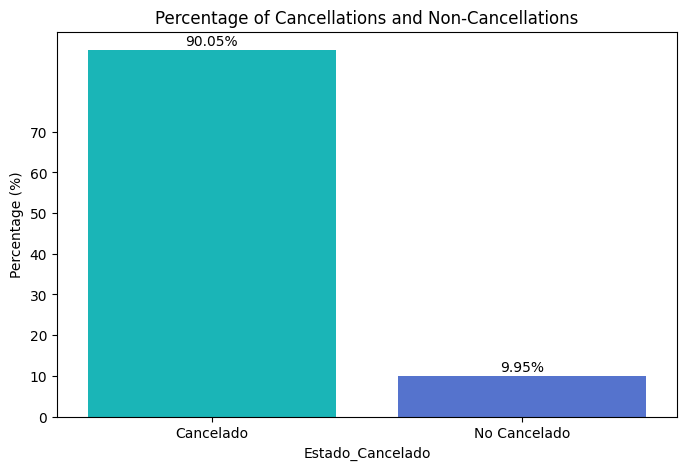

In [124]:
percentage = df_dummies['Estado_Cancelado'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])
plt.title('Percentage of Cancellations and Non-Cancellations')
plt.xlabel('Estado_Cancelado')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Cancelado', 'No Cancelado'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

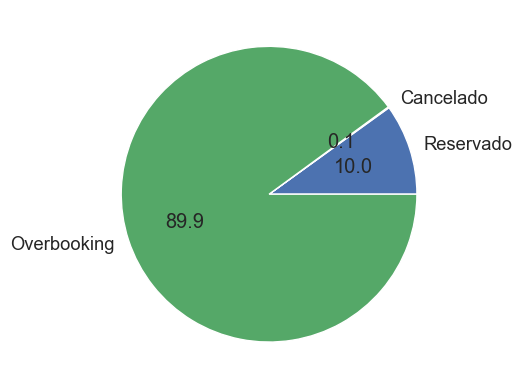

In [165]:
plt.pie(df.groupby(by=["Estado"]).size(), labels = df["Estado"].unique(), autopct = "%0.1f")
plt.show()

In [125]:
# Lista de columnas que quieres eliminar
columns_to_remove = ['Salida', 'Detalles de precios', 'Mensaje_Huesped', 'BOOKING_NOTE']  # Reemplaza con tus nombres de columnas

# Eliminar columnas del DataFrame
df_dummies = df_dummies.drop(columns=columns_to_remove, errors='ignore')
print(df_dummies)

       Adultos  Ni√±os  Precio  Comisi√≥n incluida  N√∫mero de noches  \
0          1.0    1.0  234.90              35.23                 2   
1          2.0    0.0   95.00              14.25                 1   
2          4.0    0.0  245.00              36.75                 1   
3          0.0    0.0   40.00               0.00                 2   
4          2.0    0.0  201.00              30.15                 1   
...        ...    ...     ...                ...               ...   
14165      1.0    0.0  520.00               0.00                 4   
14166      7.0    0.0  159.25              23.89                 1   
14167      6.0    0.0  521.60              78.24                 2   
14168      5.0    0.0  671.80             100.77                 2   
14169      7.0    0.0  261.80              35.70                 2   

       Numero_Huespedes     ADR  Precio_Medio_Historico  \
0                   2.0  117.45              110.427971   
1                   2.0   95.00       

array([[<Axes: title={'center': 'Adultos'}>,
        <Axes: title={'center': 'Ni√±os'}>,
        <Axes: title={'center': 'Precio'}>],
       [<Axes: title={'center': 'Comisi√≥n incluida'}>,
        <Axes: title={'center': 'N√∫mero de noches'}>,
        <Axes: title={'center': 'Numero_Huespedes'}>],
       [<Axes: title={'center': 'ADR'}>,
        <Axes: title={'center': 'Precio_Medio_Historico'}>,
        <Axes: title={'center': 'Apartamentos_Ocupados'}>],
       [<Axes: title={'center': 'Porcentaje_Ocupacion'}>,
        <Axes: title={'center': 'Lead_Time_Days'}>,
        <Axes: title={'center': 'Reservas_Hechas'}>]], dtype=object)

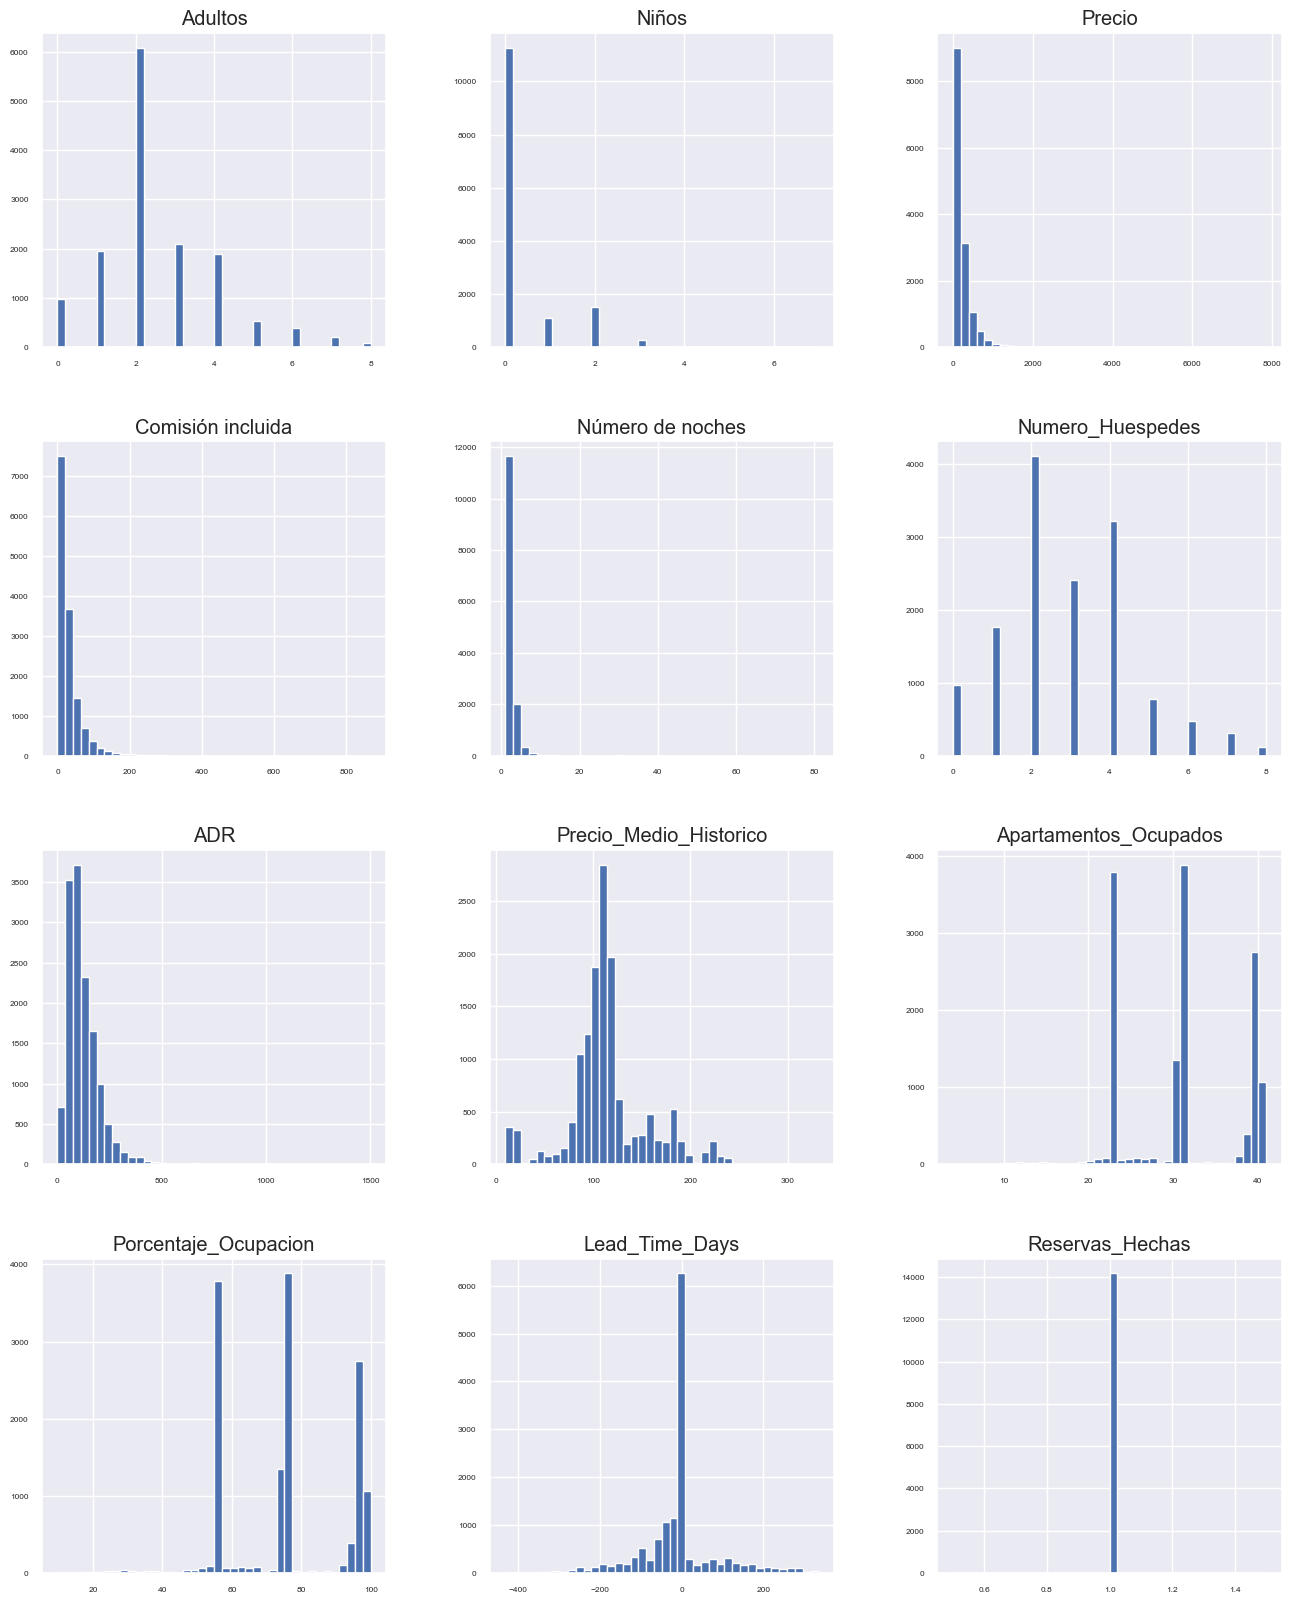

In [148]:
df_num = df_dummies.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6)

# PASO 6 | MODELOS

In [126]:
from sklearn.model_selection import train_test_split

X_train = df_dummies.drop('Estado_Cancelado', axis=1)  # asumiendo que 'Estado_Cancelado' es tu variable objetivo
y_train = df_dummies['Estado_Cancelado']

print(X_train.dtypes)



Adultos                      float64
Ni√±os                        float64
Precio                       float64
Comisi√≥n incluida            float64
N√∫mero de noches               int64
                              ...   
Adelanto ya pagado_No           bool
Adelanto ya pagado_S√≠           bool
Pagado_No                       bool
Pagado_S√≠                       bool
Mensaje_Huesped_Informada      int32
Length: 66, dtype: object


In [127]:
# Identificar columnas de tipo 'object'
object_columns = X_train.select_dtypes(include=['object']).columns
print("Columnas tipo 'object':", object_columns)

Columnas tipo 'object': Index([], dtype='object')


In [129]:
# Identificar columnas no num√©ricas
non_numeric_columns = X_train.select_dtypes(include=['object', 'datetime64']).columns
print("Columnas no num√©ricas:", non_numeric_columns)

# Inspeccionar valores en columnas no num√©ricas
for col in non_numeric_columns:
    print(f"Valores √∫nicos en la columna '{col}':")
    print(X_train[col].unique())
    print()

# Revisar tipos de datos despu√©s de transformaci√≥n
print(X_train.dtypes)
print(X_train.head())

Columnas no num√©ricas: Index([], dtype='object')
Adultos                      float64
Ni√±os                        float64
Precio                       float64
Comisi√≥n incluida            float64
N√∫mero de noches               int64
                              ...   
Adelanto ya pagado_No           bool
Adelanto ya pagado_S√≠           bool
Pagado_No                       bool
Pagado_S√≠                       bool
Mensaje_Huesped_Informada      int32
Length: 66, dtype: object
   Adultos  Ni√±os  Precio  Comisi√≥n incluida  N√∫mero de noches  \
0      1.0    1.0   234.9              35.23                 2   
1      2.0    0.0    95.0              14.25                 1   
2      4.0    0.0   245.0              36.75                 1   
3      0.0    0.0    40.0               0.00                 2   
4      2.0    0.0   201.0              30.15                 1   

   Numero_Huespedes     ADR  Precio_Medio_Historico  Apartamentos_Ocupados  \
0               2.0  117.45       

In [131]:
X_train['Lead_Time_Days'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14170 entries, 0 to 14169
Series name: Lead_Time_Days
Non-Null Count  Dtype  
--------------  -----  
14170 non-null  float64
dtypes: float64(1)
memory usage: 110.8 KB


In [133]:
# Tenemos un DataFrame llamado 'df_dummies'
# Definir X (caracter√≠sticas) e y (variable objetivo)
X = df_dummies.drop(columns=['Estado_Cancelado'])
y = df_dummies['Estado_Cancelado']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


## Nota:
En la divisi√≥n anterior, utilizamos la estratificaci√≥n, lo que garantiza que la distribuci√≥n de la variable objetivo (Estado_Cancelado) sea la misma tanto en el conjunto de entrenamiento como en el conjunto de prueba.

# B.- RANDOM FOREST CLASSIFIER  

In [152]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train , y_train)

RandomForestClassifier()

In [153]:
RF_model.score(X_train , y_train)

1.0

In [154]:
RF_pred = RF_model.predict(X_test)

In [155]:
accuracy_score(y_test , RF_pred)

1.0

In [156]:
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2552
        True       1.00      1.00      1.00       282

    accuracy                           1.00      2834
   macro avg       1.00      1.00      1.00      2834
weighted avg       1.00      1.00      1.00      2834



Text(88.25, 0.5, 'Truh')

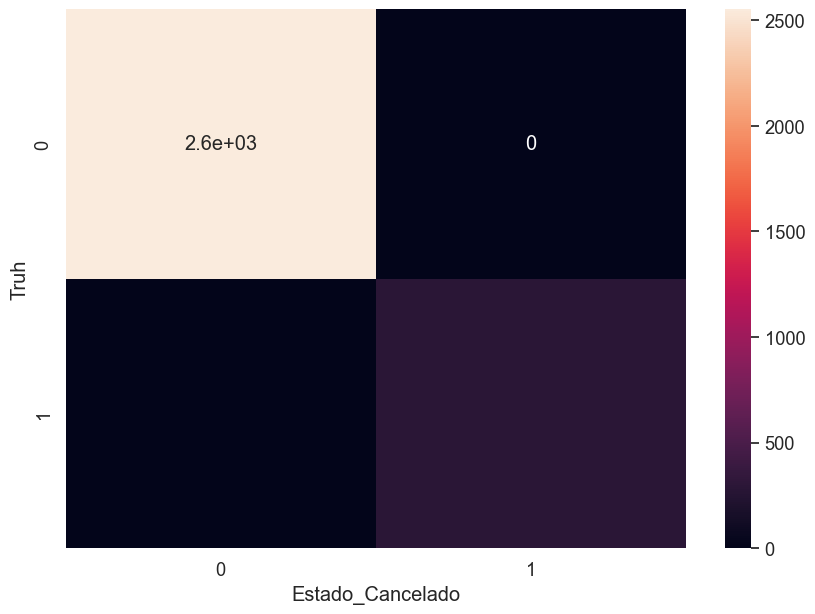

In [160]:
cm1 = confusion_matrix(y_test,RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('Estado_Cancelado')
plt.ylabel('Truh')

# CLARINETE QUE ESTO EST√° MUY DESCOMPENSADO. VAMOS A INTENTAR BALANCEAR LA MUESTRA

## 1. Submuestreo de la Clase Mayoritaria (Undersampling)
Puedes reducir el tama√±o de la clase mayoritaria para equilibrar el n√∫mero de muestras en cada clase. Esto puede ser efectivo si tienes una cantidad muy grande de datos en la clase mayoritaria, pero corres el riesgo de perder informaci√≥n valiosa.

In [147]:
from imblearn.under_sampling import RandomUnderSampler

# Definir el submuestreador
rus = RandomUnderSampler(random_state=42)

# Aplicar el submuestreo
X_resampled, y_resampled = rus.fit_resample(X, y)

ImportError: cannot import name 'parse_version' from 'sklearn.utils' (c:\Users\jazpi\anaconda3\Lib\site-packages\sklearn\utils\__init__.py)

## 2.  SMOTE 
(Synthetic Minority Over-sampling Technique) para balancear tu dataset

In [ ]:
from imblearn.over_sampling import SMOTE

# Inicializar SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Distribuci√≥n antes de SMOTE: {y_train.value_counts()}")
print(f"Distribuci√≥n despu√©s de SMOTE: {y_train_smote.value_counts()}")

# B | DECISION TREE CLASSIFIER
Visto el √©xito y que no podemos desbalancear, vamos a ver si eligiendo un modelo que se anjuste s√≥lo mejor conseguimos algo m√°s realista.


In [134]:
dt_base = DecisionTreeClassifier(random_state=0)



# üéØ Nota: 

En este problema de reservas de hotel, la variable objetivo es Estado_Cancelado, que indica si una reserva fue cancelada (1) o no (0). Tanto los falsos positivos (una reserva se predice como cancelada, pero no lo est√°) como los falsos negativos (una reserva se predice como no cancelada, pero lo est√°) pueden ser costosos para el hotel.

Sin embargo, los falsos negativos pueden ser m√°s costosos porque el hotel podr√≠a perder potenciales clientes al sobrebookear habitaciones, esperando cancelaciones que no ocurren. Por lo tanto, es importante minimizar los falsos negativos, lo que significa que maximizar el recall para la clase 'cancelada' (1) ser√≠a un buen enfoque.

La precisi√≥n (precision) tambi√©n es importante porque minimiza los falsos positivos, lo que significa minimizar los casos en los que el modelo predice una cancelaci√≥n, pero el hu√©sped realmente llega. Esto podr√≠a llevar a un exceso de reservas y a clientes insatisfechos.

Por lo tanto, la F1-score, que es la media arm√≥nica de precisi√≥n y recall, ser√≠a una buena m√©trica para usar, ya que equilibra tanto la precisi√≥n como el recall. Espec√≠ficamente, la F1-score para la clase 'cancelada' (1) ser√≠a la m√©trica m√°s importante para evaluar los modelos en este proyecto.

Creamos la funcio√≥n que identifica el conjunto de hiperpar√°metros que maximic el F1-score para la clase (Reservas Canceladas)

In [135]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='f1', n_splits=5):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest F1-score for class 1 (canceled bookings) is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [137]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11336 entries, 12157 to 4984
Data columns (total 66 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Adultos                            11336 non-null  float64
 1   Ni√±os                              11336 non-null  float64
 2   Precio                             11336 non-null  float64
 3   Comisi√≥n incluida                  11336 non-null  float64
 4   N√∫mero de noches                   11336 non-null  int64  
 5   Numero_Huespedes                   11336 non-null  float64
 6   ADR                                11336 non-null  float64
 7   Precio_Medio_Historico             11336 non-null  float64
 8   Apartamentos_Ocupados              11336 non-null  float64
 9   Porcentaje_Ocupacion               11336 non-null  float64
 10  Lead_Time_Days                     11336 non-null  float64
 11  Reservas_Hechas                    11336 non-null  in

# B.- GRID de HYPERPAR√ÅMETROS.
Buscamos afinar el resultado de nuestro Arbol de Decisi√≥n.

In [138]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [13, 14, 15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [{0: 1, 1: w} for w in [1, 2, 3]]
}

### Como no he conseguido balancear la muestra, le daremos un peso a uno de los par√°metros.

In [139]:
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [141]:
print('Mejor DT:', best_dt)

print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

Mejor DT: DecisionTreeClassifier(class_weight={0: 1, 1: 1}, max_depth=13, random_state=0)
DT Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [142]:
DT_Hyperparameters_OPtimos = {
 'class_weight': {0: 1, 1: 1}, 
 'criterion': 'gini', 
 'max_depth': 13, 
 'min_samples_leaf': 1, 
 'min_samples_split': 2
 }

FUNCI√ìN para SACAR las M√âTRICAS

In [144]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    The metrics are calculated specifically for class 1.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

FUNCI√ìN para SACAR las M√âTRICAS de EVALUACI√ìN

In [166]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports, 
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Define a colormap
    royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
    royalblue_r = royalblue.reversed()

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show() 


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10208
        True       1.00      1.00      1.00      1128

    accuracy                           1.00     11336
   macro avg       1.00      1.00      1.00     11336
weighted avg       1.00      1.00      1.00     11336


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2552
        True       1.00      1.00      1.00       282

    accuracy                           1.00      2834
   macro avg       1.00      1.00      1.00      2834
weighted avg       1.00      1.00      1.00      2834



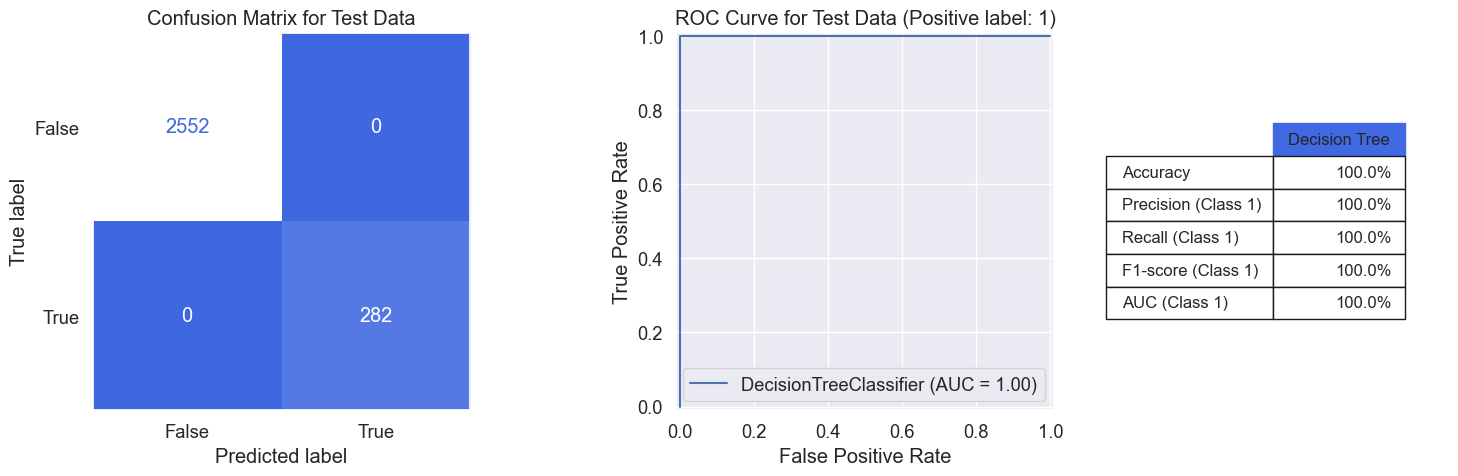

In [167]:
model_evaluation(best_dt, X_train, X_test, y_train, y_test, 'Decision Tree')

# C | XGBoost Model Building
eXtreme Gradient Boosting, es una implementaci√≥n eficiente y escalable del m√©todo de gradient boosting. Es un algoritmo de aprendizaje autom√°tico basado en √°rboles de decisi√≥n que utiliza un marco de gradient boosting. Es especialmente popular y efectivo para tareas de clasificaci√≥n y regresi√≥n, y ha ganado reputaci√≥n por su rendimiento y velocidad en comparaci√≥n con otras implementaciones de gradient boosting. XGBoost est√° dise√±ado para ser eficiente, flexible y port√°til.

In [169]:
# Definimos el modelo
xgb_base = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

In [172]:
# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [250, 350],
    'learning_rate': [0.01, 0.1],
    'max_depth': [7, 8],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.8, 0.9],
    'scale_pos_weight': [1, (y_train == 0).sum() / (y_train == 1).sum()]
}

In [173]:
# Call the function for hyperparameter tuning
best_xgb, best_xgb_hyperparams = tune_clf_hyperparameters(xgb_base, param_grid_xgb, X_train, y_train)

In [174]:
print('XGBoost Optimal Hyperparameters: \n', best_xgb_hyperparams)

XGBoost Optimal Hyperparameters: 
 {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 250, 'scale_pos_weight': 1, 'subsample': 0.7}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10208
        True       1.00      1.00      1.00      1128

    accuracy                           1.00     11336
   macro avg       1.00      1.00      1.00     11336
weighted avg       1.00      1.00      1.00     11336


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2552
        True       1.00      1.00      1.00       282

    accuracy                           1.00      2834
   macro avg       1.00      1.00      1.00      2834
weighted avg       1.00      1.00      1.00      2834



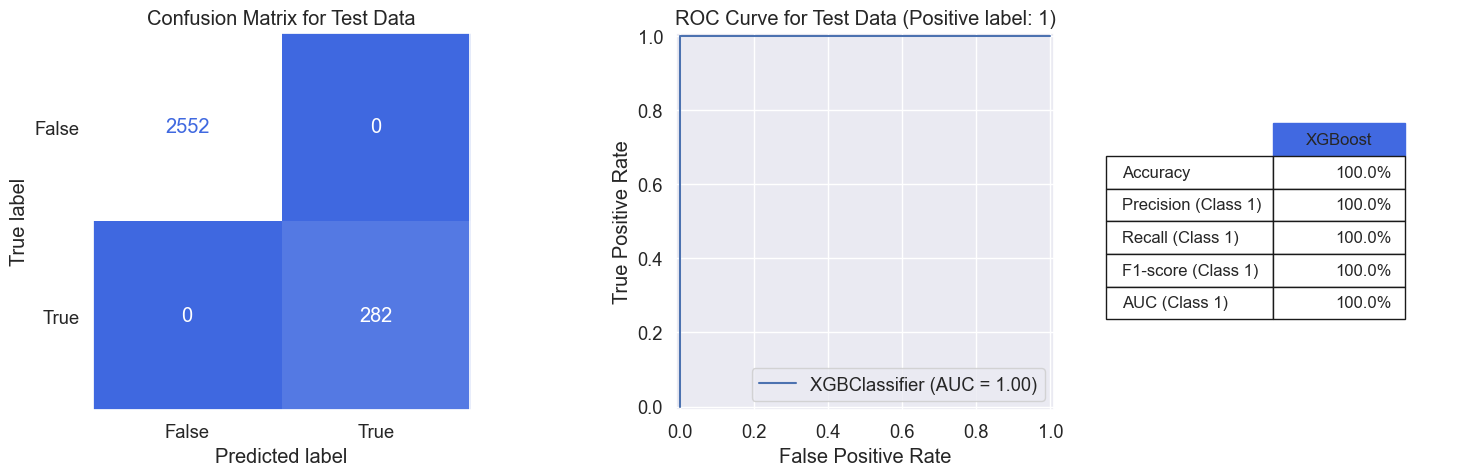

In [175]:
model_evaluation(best_xgb, X_train, X_test, y_train, y_test, 'XGBoost')